https://www.kaggle.com/abhinavjhanwar/credit-analysis-kmeans-hc-gaussian-spectral-dbscan

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import plotly.express as px
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

C:\Users\TEMP.MYCOMPUTER.004\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
data = pd.read_csv('data/CC GENERAL.csv')
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [3]:
data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [4]:
df = data.copy()
numerical_features = ['BALANCE', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS']

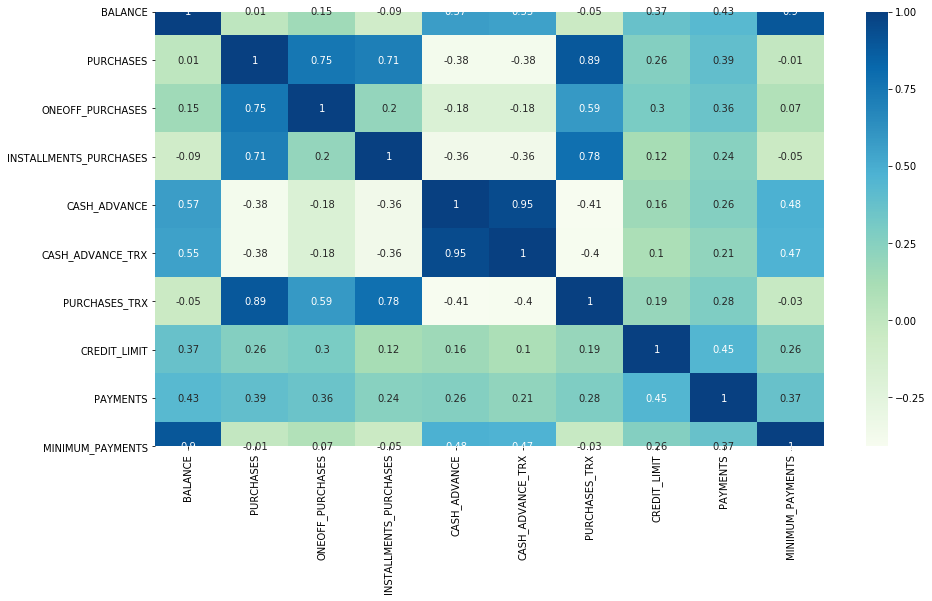

In [5]:
plt.figure(figsize=(15, 8))
sns.heatmap(round(data[numerical_features].corr(method='spearman'), 2), 
            annot=True, mask=None, cmap='GnBu')
plt.show()

C:\Users\TEMP.MYCOMPUTER.004\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning:

invalid value encountered in greater_equal

C:\Users\TEMP.MYCOMPUTER.004\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning:

invalid value encountered in less_equal



<Figure size 1080x576 with 0 Axes>

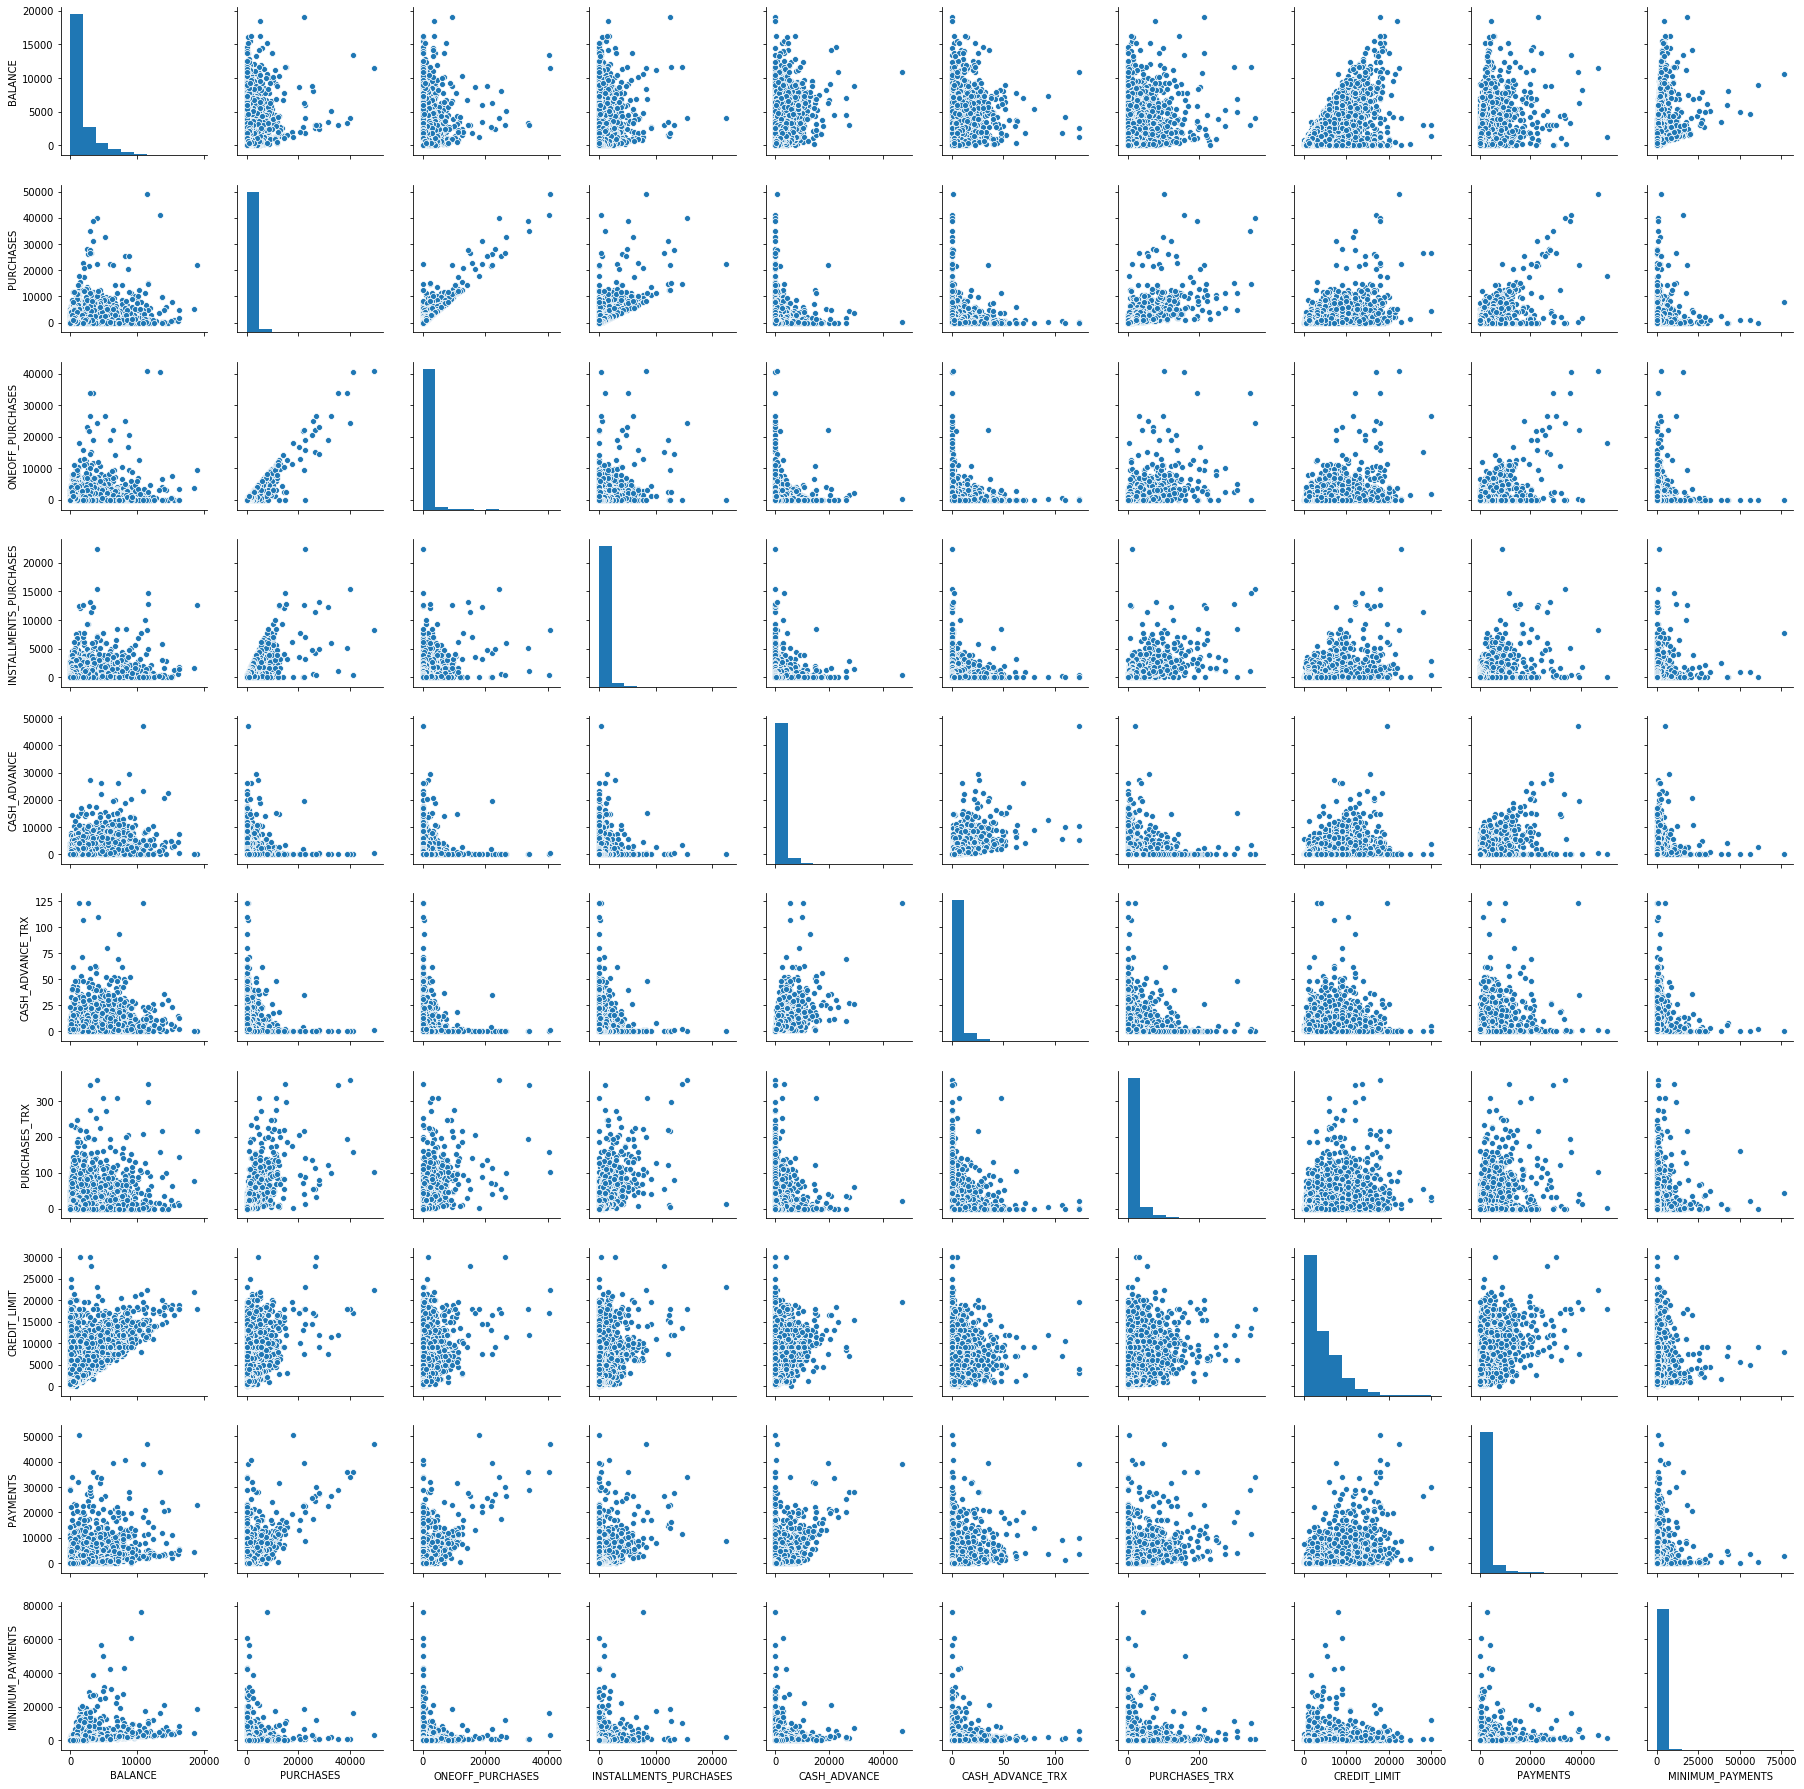

In [6]:
plt.figure(figsize=(15, 8))
sns.pairplot(data[numerical_features])
plt.show()

In [7]:
corr_mat = data[numerical_features].corr()
corr_mat = corr_mat.unstack()
corr_mat = corr_mat.sort_values(kind="quicksort").drop_duplicates()
corr_mat[corr_mat>0.5]

CREDIT_LIMIT            BALANCE             0.531283
ONEOFF_PURCHASES        PURCHASES_TRX       0.545523
PAYMENTS                ONEOFF_PURCHASES    0.567292
PURCHASES               PAYMENTS            0.603264
INSTALLMENTS_PURCHASES  PURCHASES_TRX       0.628108
CASH_ADVANCE_TRX        CASH_ADVANCE        0.656498
INSTALLMENTS_PURCHASES  PURCHASES           0.679896
PURCHASES               PURCHASES_TRX       0.689561
ONEOFF_PURCHASES        PURCHASES           0.916845
BALANCE                 BALANCE             1.000000
dtype: float64

In [8]:
# Imputing CREDIT_LIMIT & MINIMUM_PAYMENTS as per BALANCE
print('Before Imputation:')
print(data[['CREDIT_LIMIT', 'MINIMUM_PAYMENTS']].describe().T)

data.sort_values(by='BALANCE', inplace=True)
# now use backfill method to replace
data['CREDIT_LIMIT'].fillna(data['CREDIT_LIMIT'].mean(), inplace=True)
data['MINIMUM_PAYMENTS'].fillna(method='bfill', inplace=True)

print('\nAfter Imputation:')
print(data[['CREDIT_LIMIT', 'MINIMUM_PAYMENTS']].describe().T)

Before Imputation:
                   count         mean          std        min          25%  \
CREDIT_LIMIT      8949.0  4494.449450  3638.815725  50.000000  1600.000000   
MINIMUM_PAYMENTS  8637.0   864.206542  2372.446607   0.019163   169.123707   

                          50%          75%          max  
CREDIT_LIMIT      3000.000000  6500.000000  30000.00000  
MINIMUM_PAYMENTS   312.343947   825.485459  76406.20752  

After Imputation:
                   count         mean          std        min          25%  \
CREDIT_LIMIT      8950.0  4494.449450  3638.612411  50.000000  1600.000000   
MINIMUM_PAYMENTS  8950.0   843.323173  2335.737040   0.019163   165.719355   

                          50%          75%          max  
CREDIT_LIMIT      3000.000000  6500.000000  30000.00000  
MINIMUM_PAYMENTS   297.559478   796.951391  76406.20752  


In [9]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering 
from sklearn.mixture import GaussianMixture
from sklearn.cluster import SpectralClustering 
from sklearn.cluster import DBSCAN

In [10]:
feature_cols = [feature for feature in data.columns if feature not in(['CUST_ID'])]
train_data = data.copy()[feature_cols]
print('features used- ', feature_cols)

features used-  ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']


In [11]:
# rescaling data
scale = StandardScaler()
train_data = scale.fit_transform(train_data)
train_data

array([[-0.75163981, -3.70327107, -0.37599768, ..., -0.35503799,
        -0.52555097,  0.36067954],
       [-0.75163981, -3.70327107, -0.36087024, ..., -0.35503799,
        -0.52555097,  0.36067954],
       [-0.75163981, -3.70327107, -0.28547177, ..., -0.35503799,
        -0.52555097,  0.36067954],
       ...,
       [ 7.08191795,  0.51808382,  0.35916669, ...,  3.21215007,
        -0.52555097,  0.36067954],
       [ 8.13440805,  0.51808382,  2.00563738, ...,  1.44877073,
        -0.52555097,  0.36067954],
       [ 8.39748862,  0.51808382,  9.83223198, ...,  7.61159458,
        -0.52555097,  0.36067954]])

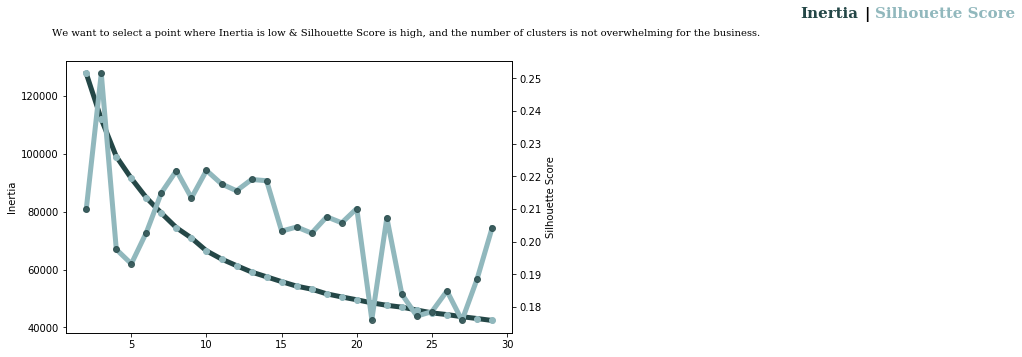

In [12]:
inertia=[]
silhouetteScore = []
n_clusters = 30
for i in range(2, n_clusters):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(train_data)
    inertia.append(kmeans.inertia_)
    silhouetteScore.append(silhouette_score(train_data, kmeans.predict(train_data)))

fig, ax1 = plt.subplots(figsize=(8, 5))
#fig.text(0.1, 1, 'Skipping ', fontfamily='serif', fontsize=12, fontweight='bold')
fig.text(0.1, 0.95, 'We want to select a point where Inertia is low & Silhouette Score is high, and the number of clusters is not overwhelming for the business.',
         fontfamily='serif',fontsize=10)
fig.text(1.4, 1, 'Inertia', fontweight="bold", fontfamily='serif', fontsize=15, color='#244747')
fig.text(1.51, 1, "|", fontweight="bold", fontfamily='serif', fontsize=15, color='black')
fig.text(1.53, 1, 'Silhouette Score', fontweight="bold", fontfamily='serif', fontsize=15, color='#91b8bd')

ax1.plot(range(2, n_clusters), inertia, '-', color='#244747', linewidth=5)
ax1.plot(range(2, n_clusters), inertia, 'o', color='#91b8bd')
ax1.set_ylabel('Inertia')

ax2 = ax1.twinx()
ax2.plot(range(2, n_clusters), silhouetteScore, '-', color='#91b8bd', linewidth=5)
ax2.plot(range(2, n_clusters), silhouetteScore, 'o', color='#244747', alpha=0.8)
ax2.set_ylabel('Silhouette Score')

plt.xlabel('Number of clusters')
plt.show()

In [13]:
model = KMeans(n_clusters=7, init='k-means++', random_state=0, algorithm='elkan')
y = model.fit_predict(train_data)

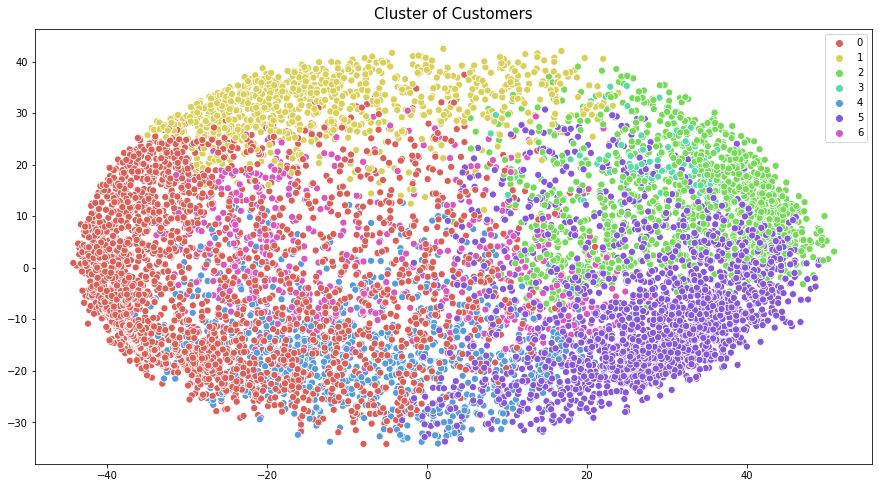

In [14]:
dist = 1-cosine_similarity(train_data)

pca = PCA(2)
pca.fit(dist)
X_PCA = pca.transform(dist)

# Visualizing all the clusters 
plt.figure(figsize=(15,8))
sns.scatterplot(x=X_PCA[:, 0], y=X_PCA[:, 1], 
                hue=y, palette=sns.color_palette('hls', model.cluster_centers_.shape[0]), s=50)
plt.title('Cluster of Customers', size=15, pad=10)
plt.legend(loc=0, bbox_to_anchor=[1,1])
plt.show()

In [15]:
dist = 1-cosine_similarity(train_data)

pca = PCA(3)
pca.fit(dist)
X_PCA = pca.transform(dist)

# Visualizing all the clusters 
fig = px.scatter_3d(x=X_PCA[:,0], y=X_PCA[:,1], z=X_PCA[:,2],
                    color=y, opacity=0.8)
fig.show()